# Ensemble Models: Random Forest with the Taiwon Bankrupt Data.

In this project, i am going to expand the decision tree model into an entire forest (an example of something called an ensemble model); learn how to use a grid search to tune hyperparameters; and create a function that loads data and a pre-trained model, and uses that model to generate a Series of predictions.

**Importing Labraries**

In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

**Creating a Wrangle Function**

In [2]:
def wrangle(file_path):
    df = pd.read_json(file_path)
    
    df ["bankrupt"] = df["Bankrupt?"]>0
    
    df.drop(columns=["Bankrupt?", "Total expense", "Total income", "Current Liabilities", "Inventory", "Working Capital", "Current Assets", "Quick Assets", "Cash",
                "Inventory and accounts receivable", "Net profit before tax", "Operating profit", "Contingent liabilities", "Net worth",
                 "Total debt", "Non-industry income and expenditure"], inplace=True)
    
    return df

In [4]:
df = wrangle("taiwon_bankruptcy_data.json")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 77 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1   ROA(A) before interest and % after tax                   6819 non-null   float64
 2   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3   Operating Gross Margin                                   6819 non-null   float64
 4   Realized Sales Gross Margin                              6819 non-null   float64
 5   Operating Profit Rate                                    6819 non-null   float64
 6   Pre-tax net Interest Rate                                6819 non-null   float64
 7   After-tax net Interest Rate                              6819 non-null   float64
 8   Continuous interest rate (af

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.780985,1.256969e-04,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,True
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.781506,2.897851e-04,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,True
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.780284,2.361297e-04,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,True
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.781241,1.078888e-04,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,True
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.781550,7.890000e+09,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,True


### Split

Create your feature matrix X and target vector y. target is "bankrupt".

In [5]:
target = "bankrupt"

y = df[target]
X = df.drop(columns=[target])

Divide the data (X and y) into training and test sets using a randomized train-test split. test set should be 20% of your total data. And don't forget to set a random_state for reproducibility.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5455, 76)
(5455,)
(1364, 76)
(1364,)


### Baseline

In [7]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("accuracy baseline:", acc_baseline)

accuracy baseline: 0.9686526122823098


 Create a new feature matrix X_train_over and target vector y_train_over by performing random over-sampling on the training data.

In [8]:
over_sampler = RandomOverSampler(random_state=40)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print(X_train_over.shape)
X_train_over.head()

(10568, 76)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.458685,0.454154,0.508432,0.576111,0.576111,0.998487,0.796446,0.808405,0.780658,2.015544e-04,...,0.744635,0.003754,0.623349,0.576107,0.835667,0.280350,0.026620,0.564182,1,0.027308
1,0.460830,0.511121,0.512875,0.613824,0.613846,0.999073,0.797296,0.809228,0.781469,2.204032e-04,...,0.779891,0.003578,0.623892,0.613825,0.838791,0.279278,0.026504,0.563281,1,0.031291
2,0.534052,0.582316,0.579046,0.604715,0.604715,0.999086,0.797629,0.809488,0.781761,6.060000e+09,...,0.824112,0.002887,0.622335,0.604710,0.842178,0.279005,0.026815,0.565268,1,0.032620
3,0.435187,0.503598,0.502543,0.614869,0.615150,0.998929,0.797187,0.809198,0.781445,3.859946e-04,...,0.778489,0.000431,0.623888,0.614866,0.838912,0.277383,0.026787,0.565138,1,0.046061
4,0.521279,0.611971,0.575245,0.661994,0.661994,0.999586,0.798297,0.810146,0.782231,4.800071e-04,...,0.830972,0.005061,0.625087,0.661992,0.843016,0.280308,0.026856,0.565449,1,0.027435


### Iterate

So far, i built single models that predict a single outcome. That's definitely a useful way to predict the future, but what if the one model i built isn't the right one? If we could somehow use more than one model simultaneously, we'd have a more trustworthy prediction.

Ensemble models work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. Since i used a decision tree in the last project, i am going to create an ensemble of trees here. This type of model is called a random forest.

We'll start by creating a pipeline to streamline our workflow.

In [9]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=40)
)
clf

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=40))])

Perform cross-validation with your classifier, using the over-sampled training data. We want five folds, so set cv to 5. We also want to speed up training, to set n_jobs to -1.

In [10]:
cross_val_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cross_val_scores)

[0.99432356 0.99526963 0.99479659 0.99432087 0.99621391]


Create a dictionary with the range of hyperparameters that we want to evaluate for our classifier.

>1.For the SimpleImputer, try both the "mean" and "median" strategies.

>2.For the RandomForestClassifier, try max_depth settings between 10 and 50, by steps of 10.

>3.Also for the RandomForestClassifier, try n_estimators settings between 25 and 100 by steps of 25.

In [11]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

Creating a GridSearchCV named model that includes the classifier and hyperparameter grid, and i will use the same arguments for cv and n_jobs that you used above, and set verbose to 1.

In [12]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=40))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

Fit model to the over-sampled training data.

In [13]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=40))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

This will take some time to train, so let's take a moment to think about why. How many forests did we just test? 4 different max_depths times 3 n_estimators times 2 imputation strategies... that makes 24 forests. How many fits did we just do? 24 forests times 5 folds is 120. And remember that each forest is comprised of 25-75 trees, which works out to at least 3,000 trees. So it's computationally expensive!

Okay, now that we've tested all those models, let's take a look at the results.

In [35]:
type(model.cv_results_)

dict

In [24]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.518475,0.263293,0.202483,0.074920,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.982971,0.982971,0.983444,0.980596,0.982963,0.982589,0.001013,19
1,10.756887,0.859758,0.197886,0.041981,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.982971,0.982971,0.983444,0.980596,0.982963,0.982589,0.001013,19
2,15.473881,1.602740,0.247253,0.073397,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.981079,0.982971,0.983917,0.979650,0.983436,0.982210,0.001602,23
3,15.014488,0.218834,0.281901,0.061239,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.981079,0.982971,0.983917,0.979650,0.983436,0.982210,0.001602,23
4,24.353707,2.195166,0.469937,0.191015,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.982498,0.982025,0.982971,0.980123,0.983909,0.982305,0.001256,21
5,25.200432,2.110759,0.367783,0.039945,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.982498,0.982025,0.982971,0.980123,0.983909,0.982305,0.001256,21
6,9.032510,0.457583,0.153710,0.050444,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.990539,0.991485,0.989120,0.989115,0.991955,0.990443,0.001174,17
7,9.465758,0.492382,0.200286,0.068489,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.990539,0.991485,0.989120,0.989115,0.991955,0.990443,0.001174,17
8,16.846314,0.561583,0.233066,0.038588,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.991958,0.992904,0.990539,0.989115,0.993374,0.991578,0.001567,15
9,19.088584,0.565154,0.331211,0.076667,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.991958,0.992904,0.990539,0.989115,0.993374,0.991578,0.001567,15


Creating a mask for cv_results for rows where "param_randomforestclassifier__max_depth" equals 10. Then plot "param_randomforestclassifier__n_estimators" on the x-axis and "mean_fit_time" on the y-axis. the label your axes and include a title.

In [1]:
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

NameError: name 'cv_results' is not defined

Creating a mask for cv_results for rows where "param_randomforestclassifier__n_estimators" equals 25. Then plot "param_randomforestclassifier__max_depth" on the x-axis and "mean_fit_time" on the y-axis. label the axes and include a title.

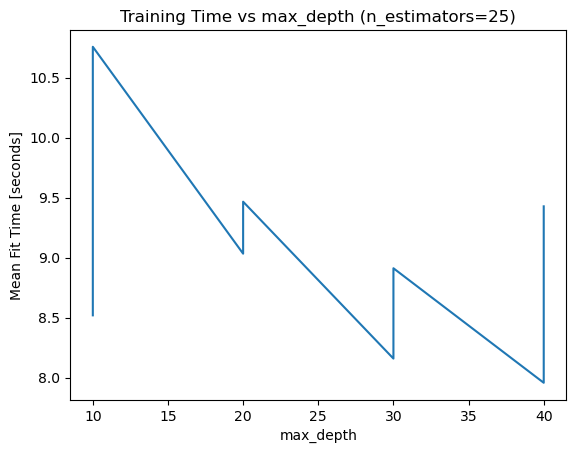

In [26]:
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("max_depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs max_depth (n_estimators=25)");

In [47]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,2.608908,10,mean
1,2.892546,10,median
6,3.572358,20,mean
7,3.950541,20,median
12,4.241176,30,mean
13,4.642945,30,median
18,4.376498,40,mean
19,4.659936,40,median


In [27]:
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [28]:
model.best_score_

0.9953632533834563

### Evaluate
All right: The moment of truth. Let's see how our model performs.

Calculate the training and test accuracy scores for model.

In [31]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("training accuracy:", acc_train.round(4))
print("test accuracy:", acc_test.round(4))

training accuracy: 1.0
test accuracy: 0.967


Plot a confusion matrix that shows how the best model performs on your test set.

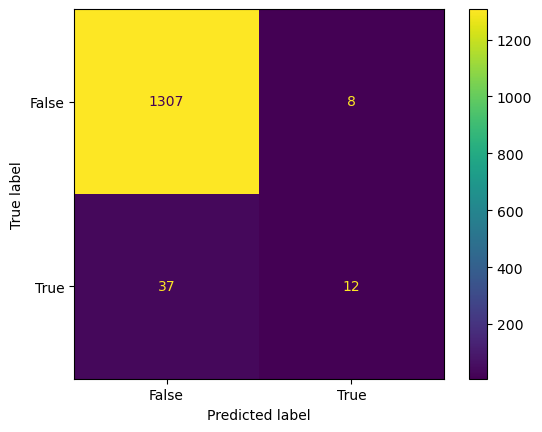

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Create a horizontal bar chart with the 10 most important features for your model.

In [56]:
feature = X_train_over.columns
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

In [57]:
feat_imp = pd.Series(importances, index=feature).sort_values()

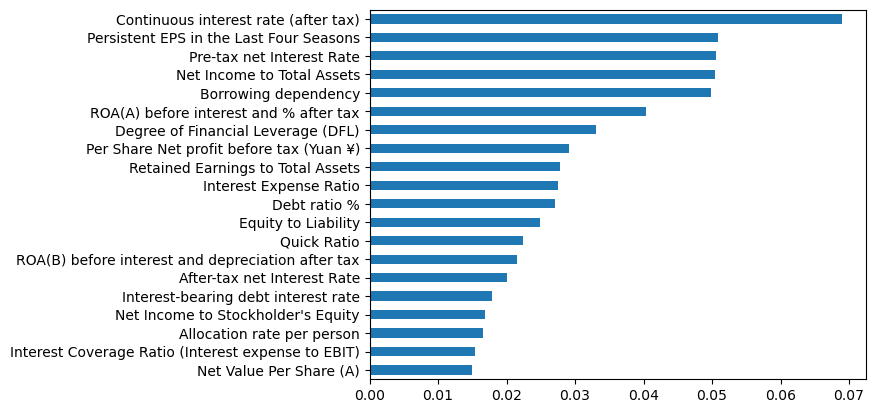

In [58]:
feat_imp.tail(20).plot(kind="barh");